In [1]:
import json
import pickle
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_to_SNe = '../gen_lightcurves/gp_smoothed/'
SNe_lightcurves = []
with open(path_to_SNe + 'OSC_derived.LIST') as readfile:
    for line in readfile:
        SNe_lightcurves += [line.rstrip('\n')]

average_time_span_Ia = []
average_time_span_nonIa = []
average_flux_Ia = []
average_flux_nonIa = []
sntypes = []

for i, lcurve in enumerate(SNe_lightcurves):
    lightcurve_path = path_to_SNe + lcurve
    #print(lightcurve_path)
    with open(path_to_SNe + lcurve) as f:
        lcurve_data = json.load(f)
        
    filt_set = set(['g'])
    if not filt_set.issubset(set(lcurve_data.keys())):
        continue
    mag_start = lcurve_data['g']['mjd'][0]
    mag_end = lcurve_data['g']['mjd'][-1]
    mag = np.array(lcurve_data['g']['mag'])
    avg_mag = mag.mean()
    sntype = lcurve_data['g']['type']
    
    if sntype == 'Ia':    
        average_time_span_Ia.append(mag_end - mag_start)
        average_flux_Ia.append(avg_mag)
    else:
        average_time_span_nonIa.append(mag_end - mag_start)
        average_flux_nonIa.append(avg_mag)
        
    sntypes += [sntype]
    
print(set(sntypes))
        
    
    #if i>20:
    #    break
print(len(average_time_span_Ia))
print(len(average_time_span_nonIa))

{'SLSN-I', 'Ibn', 'SLSN-II', 'IIb', 'Ib', 'Ia Pec', 'Ia', 'Ia-HV', 'Ic Pec', 'Ib/c', 'Ia-91T', 'Ia-02cx', 'Ic', 'II', 'Ib/c Pec', 'Ia-91bg', 'IIn', 'SLSN', 'II P'}
960
1496


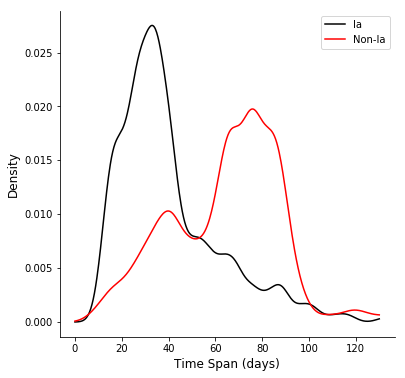

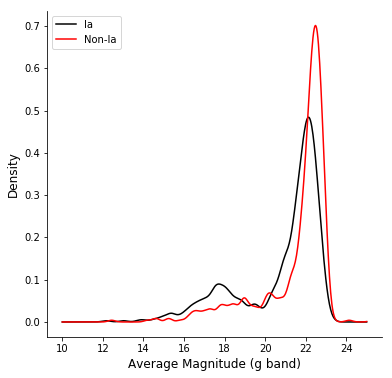

In [10]:
from scipy.stats import gaussian_kde

def plot_density(time_spans, start, end, figname, cov_factor=0.125, ylabel='Density', xlabel='X'):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel, {'fontsize': 'large'})
    ax.set_ylabel(ylabel, {'fontsize': 'large'})
    for i, time_span in enumerate(time_spans):
        density = gaussian_kde(time_span)
        xs = np.linspace(start, end, 500)
        density.covariance_factor = lambda: cov_factor
        density._compute_covariance()

        if i==0:
            label='Ia'
            color='black'
        elif i==1:
            label='Non-Ia'
            color='red'
        ax.plot(xs,density(xs), label=label,color=color)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.legend()
    #plt.grid()
    fig.savefig(figname)
    plt.show()

plot_density([average_time_span_Ia, average_time_span_nonIa], 0, 130, figname='density_time_span_OSC.pdf', xlabel='Time Span (days)')
plot_density([average_flux_Ia, average_flux_nonIa], 10, 25, figname='density_magnitude_OSC.pdf', cov_factor=0.1, xlabel='Average Magnitude (g band)')

In [26]:
path_to_SNe = '../DES_Pipeline/gen_lightcurves/des_sn.p'

with open(path_to_SNe, 'rb') as f:
    SNe_lightcurves=  pickle.load(f)

average_time_span_Ia = []
average_time_span_nonIa = []
average_flux_Ia = []
average_flux_nonIa = []
sntypes = []

for i, lcurve in enumerate(SNe_lightcurves):
    lcurve_data = SNe_lightcurves[lcurve]
        
    if 'g' not in lcurve_data.keys():
        continue
    mag_start = lcurve_data['g']['mjd'][0]
    mag_end = lcurve_data['g']['mjd'][-1]
    mag = np.array(lcurve_data['g']['mag'])
    avg_mag = mag.mean()
    sntype = lcurve_data['g']['type']
    
    if sntype in [1]:    
        average_time_span_Ia.append(mag_end - mag_start)
        average_flux_Ia.append(avg_mag)
    else:
        average_time_span_nonIa.append(mag_end - mag_start)
        average_flux_nonIa.append(avg_mag)
        
    sntypes.append(sntype)
        
    
print(set(sntypes))
    #if i>20:
    #    break
print(len(average_time_span_Ia))
print(len(average_time_span_nonIa))

{32, 33, 1, 3, 21, 22, 23}
4878
12206


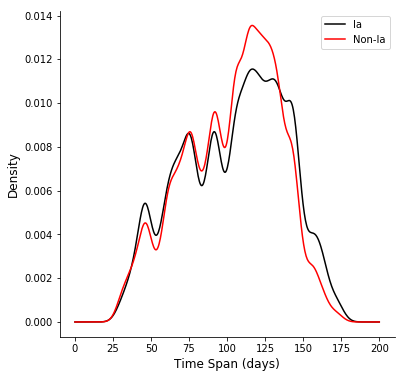

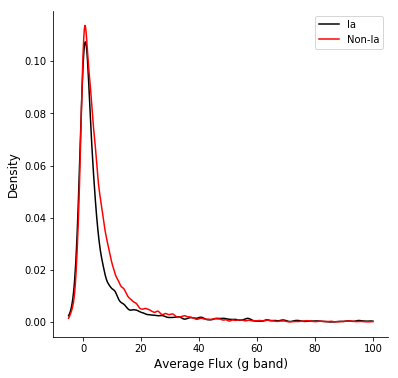

In [27]:
plot_density([average_time_span_Ia, average_time_span_nonIa], 0, 200, figname='density_time_span_DES.pdf', xlabel='Time Span (days)')
plot_density([average_flux_Ia, average_flux_nonIa], -5, 100, figname='density_flux_DES.pdf', cov_factor=0.01, xlabel='Average Flux (g band)')

In [12]:
print(len(average_time_span_Ia))
print(len(average_time_span_nonIa))

4878
12206
